# TUGAS 1

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.5 MB/s eta 0:00:00


# Penjelasan:


**a.  %pip install pymysql**

- %pip → % menandakan bahwa ini adalah perintah "magic command" dalam Jupyter Notebook. Ini berguna untuk menjalankan perintah terminal langsung dari dalam sel Jupyter.

- install → Perintah untuk menginstal pustaka menggunakan pip, yang merupakan package manager untuk Python.

- pymysql → Nama pustaka yang diinstal. PyMySQL adalah pustaka Python yang digunakan untuk berkomunikasi dengan database MySQL menggunakan koneksi berbasis protokol MySQL


**b. %pip install psycopg2**

- Sama seperti perintah sebelumnya, tetapi kali ini menginstal psycopg2.

- psycopg2 adalah pustaka Python yang digunakan untuk berkomunikasi dengan database PostgreSQL.



---


# Langkah-langkah:


**A. Pastikan Python dan pip Sudah Terinstal**

Sebelum menginstal pustaka, pastikan Python dan pip sudah terinstal di sistem Anda. Anda bisa mengeceknya dengan menjalankan perintah berikut di terminal atau command prompt:

```
python --version
pip --version
```
Jika Python dan pip belum terinstal, Anda perlu menginstalnya terlebih dahulu.


**B. Jalankan Perintah di Jupyter Notebook**

- Buka Jupyter Notebook.

- Buat sel kode baru, lalu jalankan perintah berikut

```
%pip install pymysql
%pip install psycopg2
```

- Jika berhasil, output akan menunjukkan bahwa pustaka telah berhasil diinstal.


**C. Alternatif Instalasi dari Terminal atau Command Prompt**

Jika Anda tidak menggunakan Jupyter Notebook, gunakan terminal atau command prompt dengan perintah berikut:

```
pip install pymysql psycopg2
```

atau untuk sistem yang memerlukan hak akses admin:

```
pip install pymysql psycopg2 --user
```

Untuk sistem berbasis UNIX (Linux/macOS) yang memerlukan hak akses root:

```
sudo pip install pymysql psycopg2
```


**D. Verifikasi Instalasi**

Setelah instalasi selesai, pastikan pustaka sudah berhasil terinstal dengan menjalankan kode berikut di Python:

```
import pymysql
import psycopg2

print("pymysql dan psycopg2 berhasil diimpor!")
```

Jika tidak ada error, berarti pustaka telah berhasil diinstal

**E. Troubleshooting (Mengatasi Error)**

Jika mengalami kendala dalam instalasi, berikut beberapa kemungkinan penyebabnya:

1. Pip Tidak Diperbarui Solusi:

Perbarui pip terlebih dahulu:

```
pip install --upgrade pip
```

2. Kesalahan Virtual Environment

Jika menggunakan virtual environment, aktifkan terlebih dahulu:

```
source venv/bin/activate  # Linux/macOS
venv\Scripts\activate     # Windows
```

3. Psycopg2 Tidak Bisa Diinstal di Windows

- Gunakan psycopg2-binary sebagai alternatif:

```
pip install psycopg2-binary
```

- Pastikan PostgreSQL sudah terinstal dan pg_config bisa ditemukan di sistem.


# **Kesimpulan**

- Perintah %pip install pymysql dan %pip install psycopg2 digunakan untuk menginstal pustaka koneksi database MySQL dan PostgreSQL dalam Jupyter Notebook.

- Instalasi juga bisa dilakukan di terminal menggunakan pip install pymysql psycopg2.

- Setelah instalasi, pastikan pustaka dapat diimpor tanpa error.

- Jika terjadi error, periksa pip, virtual environment, dan dependensi PostgreSQL.


 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa           1.4          0.2           4.9          3.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

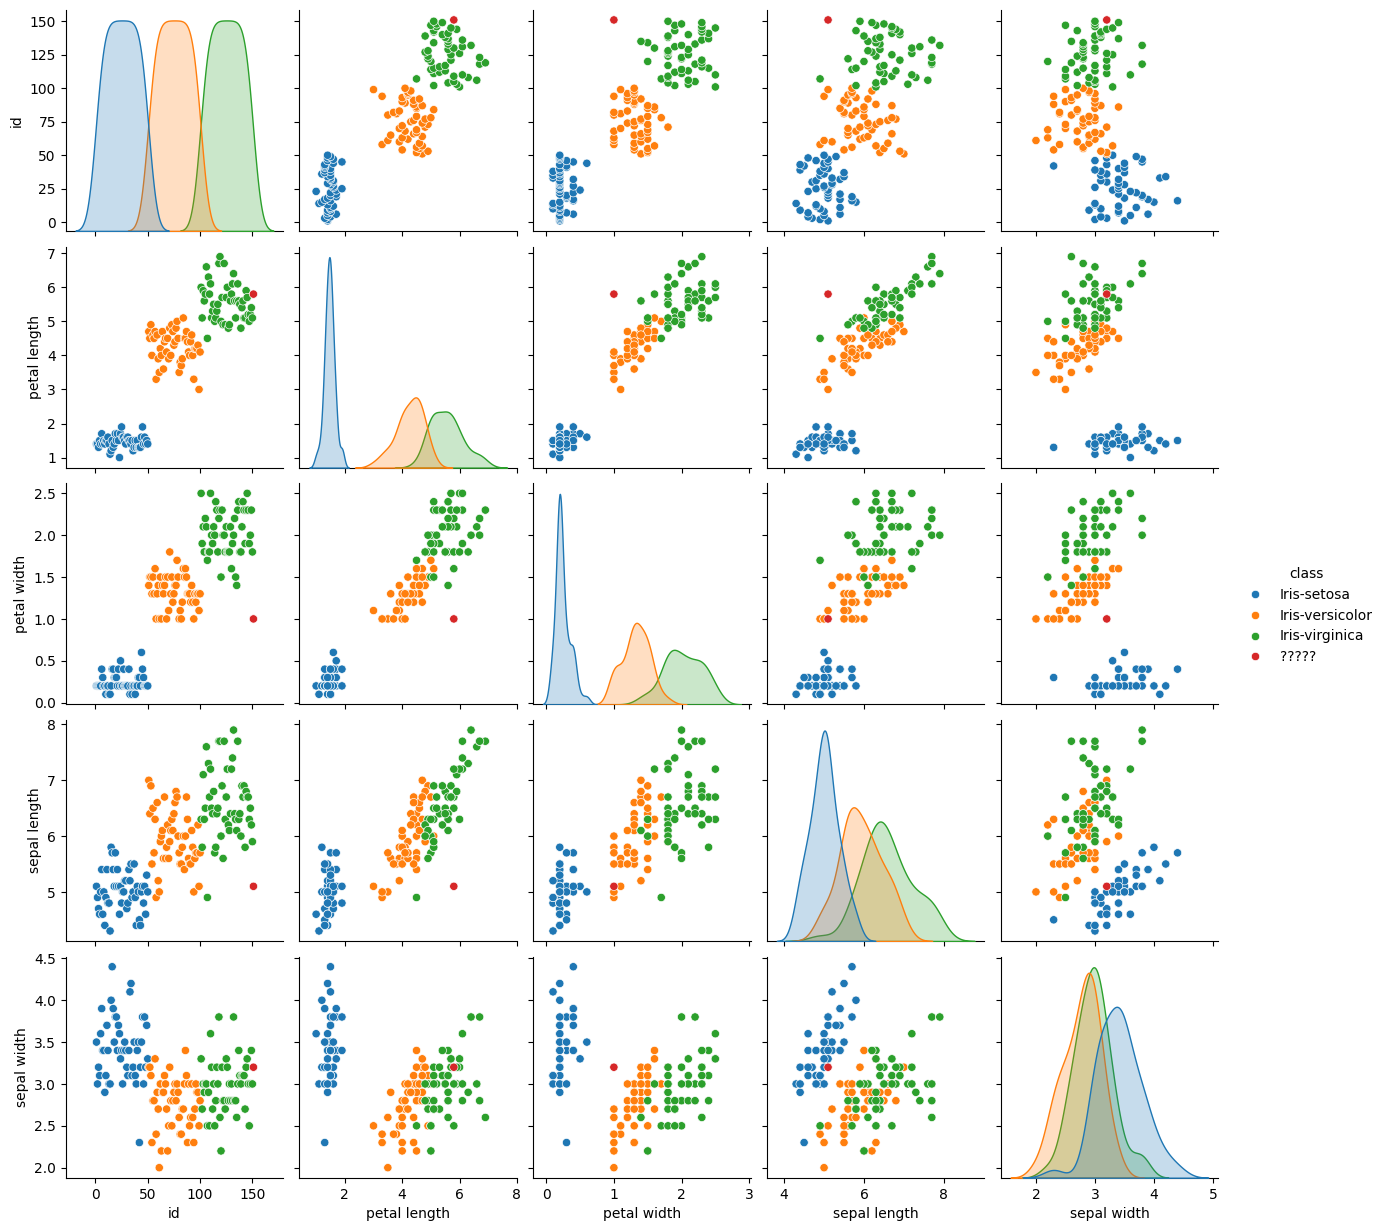

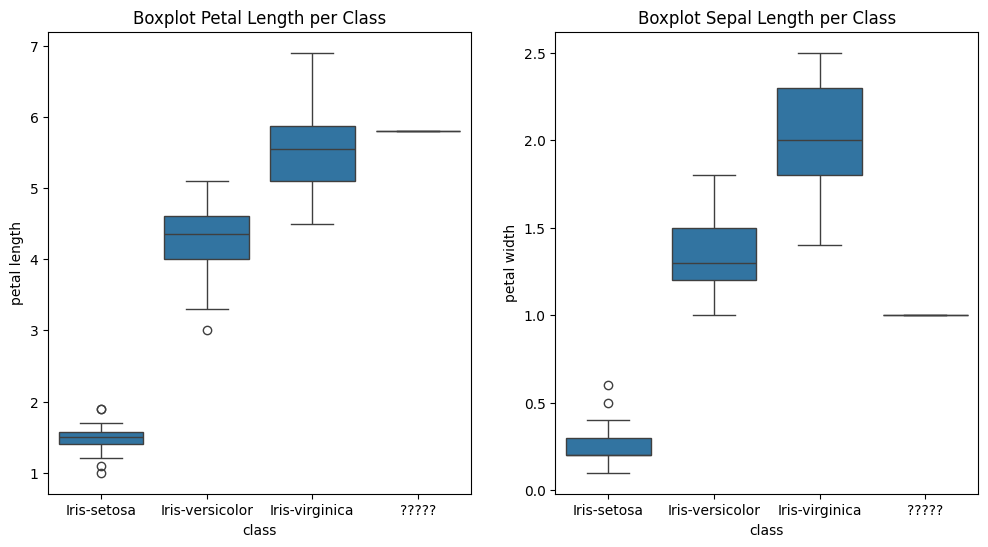

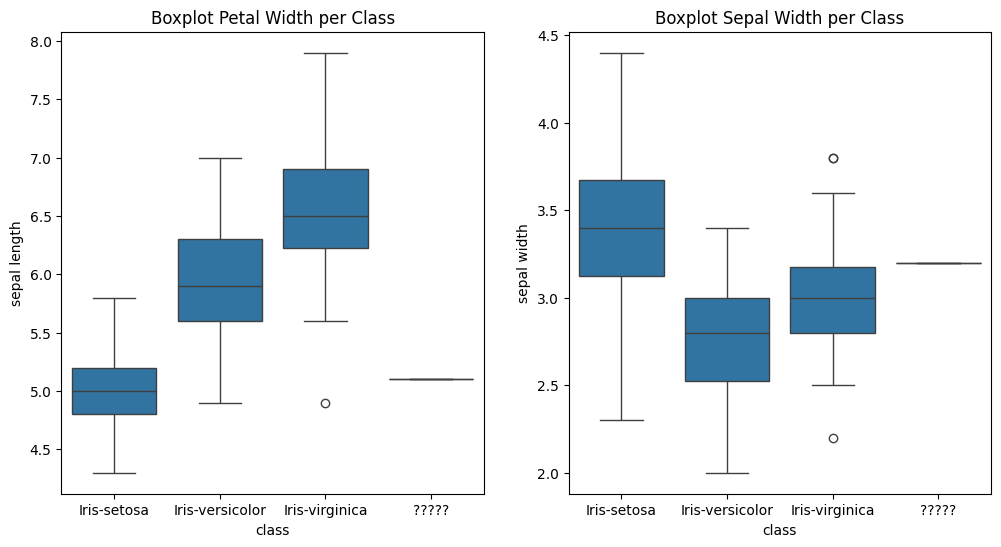

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-319a464f-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_EVJaXCw9MKrhLxoQcKj",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM lira.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-19018c16-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_rsy2_HLnOlER6ZAwLDN",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

# Visualisasi data
# Scatter plot antar variabel
sns.pairplot(df_merged, hue="class")
plt.show()

# Visualisasi data dengan boxplot per class
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="class", y=df_merged.iloc[:, 2], data=df_merged)
plt.title("Boxplot Petal Length per Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y=df_merged.iloc[:, 3], data=df_merged)
plt.title("Boxplot Sepal Length per Class")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="class", y=df_merged.iloc[:, 4], data=df_merged)
plt.title("Boxplot Petal Width per Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y=df_merged.iloc[:, 5], data=df_merged)
plt.title("Boxplot Sepal Width per Class")

plt.show()

# **Penjelasan & Langkah-langkah:**

**1. Impor Library**

```
import psycopg2  # Koneksi ke PostgreSQL
import pymysql   # Koneksi ke MySQL
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

📌 Penjelasan:

- psycopg2 → Untuk koneksi dan query ke database PostgreSQL
- pymysql → Untuk koneksi dan query ke database MySQL
- numpy → Untuk operasi numerik (walaupun tidak digunakan langsung)
- pandas → Untuk manipulasi dan analisis data
- seaborn & matplotlib.pyplot → Untuk visualisasi data


**2. Fungsi untuk Mengambil Data dari PostgreSQL**

```
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-319a464f-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_EVJaXCw9MKrhLxoQcKj",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM lira.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)
```

📌 Penjelasan:

- Membuat koneksi ke PostgreSQL menggunakan psycopg2.connect()
- Mengambil semua data dari tabel lira.postgree
- Mengonversi hasil query ke DataFrame pandas
- Menutup koneksi database


**3. Fungsi untuk Mengambil Data dari MySQL**

```
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-19018c16-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_rsy2_HLnOlER6ZAwLDN",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)
```

📌 Penjelasan:

- Sama seperti PostgreSQL, tetapi menggunakan pymysql untuk mengambil data dari tabel flowers di database MySQL.


**4. Mengambil Data dari Kedua Database**

```
# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
```

📌 Penjelasan:

- get_pg_data() → Mengambil data dari PostgreSQL.
- get_mysql_data() → Mengambil data dari MySQL.
- rename(columns={'Class': 'class'}) → Mengubah nama kolom Class menjadi class agar bisa digabung.


**5. Menggabungkan Data**

```
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")
```

📌 Penjelasan:

- pd.merge() → Menggabungkan dua DataFrame berdasarkan kolom id dan class.
- how="inner" → Hanya mengambil data yang cocok di kedua tabel.


**6. Menampilkan Data Gabungan**

```
print(df_merged.to_string(index=False))
```

📌 Penjelasan:

- to_string(index=False) → Mencetak DataFrame tanpa menampilkan indeks.


**7. Visualisasi Data**

a. Scatter Plot

```
sns.pairplot(df_merged, hue="class")
plt.show()
```

📌 Penjelasan:

- sns.pairplot(df_merged, hue="class") → Membuat scatter plot antar semua variabel dengan warna berdasarkan class.

b. Box Plot

```
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="class", y=df_merged.iloc[:, 2], data=df_merged)
plt.title("Boxplot Petal Length per Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y=df_merged.iloc[:, 3], data=df_merged)
plt.title("Boxplot Sepal Length per Class")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="class", y=df_merged.iloc[:, 4], data=df_merged)
plt.title("Boxplot Petal Width per Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y=df_merged.iloc[:, 5], data=df_merged)
plt.title("Boxplot Sepal Width per Class")

plt.show()
```

📌 Penjelasan:

- Membuat box plot untuk menganalisis distribusi data berdasarkan class.
- Setiap subplot menunjukkan distribusi panjang dan lebar petal/sepal.


**8. Langkah Eksekusi Kode**

1. Pastikan semua pustaka sudah diinsta.

```
pip install psycopg2 pymysql numpy pandas seaborn matplotlib
```

2. Jalankan kode di Jupyter Notebook atau Python script.
3. Pastikan database PostgreSQL dan MySQL tersedia.
4. Kode akan mengambil, menggabungkan, dan memvisualisasikan data.
